In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.misc import imresize, imread
import matplotlib.pyplot as plt
from skimage import transform
import timeit

start = timeit.default_timer()

C:\Users\User1\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
#test image
image = cv2.imread("C:/Users/User1/Downloads/high-resolution-target.jpg")

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
histogram = cv2.calcHist([gray_image], [0],  
                         None, [256], [0, 256]) 

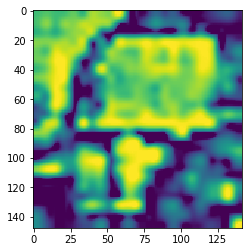

In [4]:
# image1 
image1 = cv2.imread("C:/Users/User1/Downloads/image-3.png") 
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_image1)
histogram1 = cv2.calcHist([gray_image1], [0],  
                          None, [256], [0, 256]) 

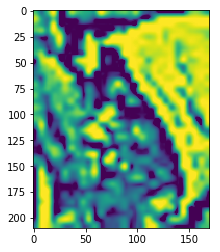

In [5]:
# image2 
image2 = cv2.imread("C:/Users/User1/Downloads/image-2.png") 
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image2)
histogram2 = cv2.calcHist([gray_image2], [0],  
                          None, [256], [0, 256]) 
   

In [6]:
c1, c2 = 0, 0
   
# Euclidean Distace between data1 and test 
i = 0
while i<len(histogram) and i<len(histogram1): 
    c1+=(histogram[i]-histogram1[i])**2
    i+= 1
c1 = c1**(1 / 2) 
   
  
# Euclidean Distace between data2 and test 
i = 0
while i<len(histogram) and i<len(histogram2): 
    c2+=(histogram[i]-histogram2[i])**2
    i+= 1
c2 = c2**(1 / 2) 
   
if(c1<c2): 
    print("image1.jpg is more similar to test.jpg as compare to image2.jpg") 
else: 
    print("image2.jpg is more similar to test.jpg as compare to image1.jpg") 

image2.jpg is more similar to test.jpg as compare to image1.jpg


In [7]:
img = cv2.imread("C:/Users/User1/Downloads/high-resolution-target.jpg")
img=img.astype(np.uint8)
template = cv2.imread("C:/Users/User1/Downloads/image-2.png",0)
# resize images
image = cv2.resize(img, (0,0), fx=0.6, fy=0.6) 
template = cv2.resize(template, (0,0), fx=0.6, fy=0.6) 

# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find template
result = cv2.matchTemplate(imageGray,template,cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h,w = template.shape
bottom_right = (top_left[0] +w,top_left[1]+h-188)
cv2.rectangle(image,top_left, bottom_right,(0,0,155),4)

# Show result
cv2.imshow("Template", template)
cv2.imshow("Result", image)

cv2.moveWindow("Template", 10, 50);
cv2.moveWindow("Result", 150, 50);

cv2.waitKey(0)

-1

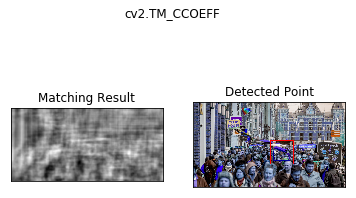

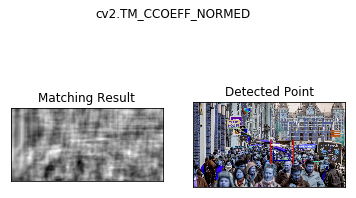

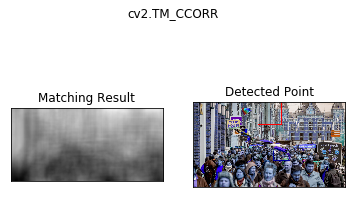

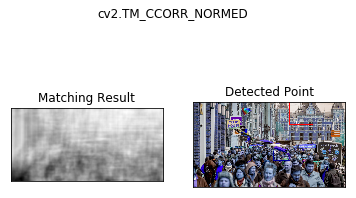

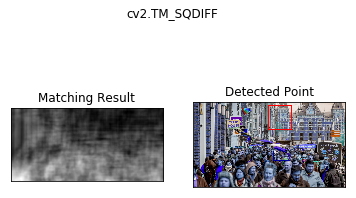

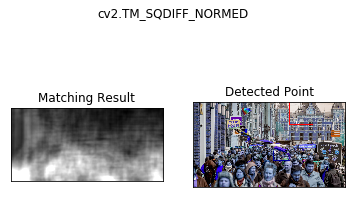

In [8]:
img = cv2.imread("C:/Users/User1/Downloads/high-resolution-target.jpg")
img=img.astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
template2 = cv2.imread("C:/Users/User1/Downloads/image-3.png")
template2 = cv2.cvtColor(template2, cv2.COLOR_BGR2RGB)
h,w,channels = template2.shape
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = image.copy()
    method = eval(meth)
     # Apply template Matching
    res = cv2.matchTemplate(img,template2,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w-288, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121)
    plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(meth)

    plt.show()

The 2 methods TM_COEFF,TM_COEFF_NORM , was able to detect the range of the query1.

# Generalizability-Test with neww Image 

In [9]:
#test image
test = cv2.imread("C:/Users/User1/Desktop/New folder (2)/WhatsApp Image 2020-10-21 at 19.27.50.jpeg")
tq=cv2.imread("C:/Users/User1/Desktop/New folder (2)/test1.jpg")
tq1=cv2.imread("C:/Users/User1/Desktop/New folder (2)/test2.jpg")

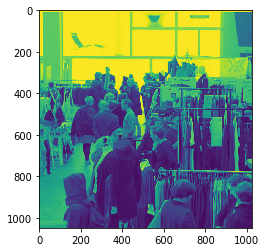

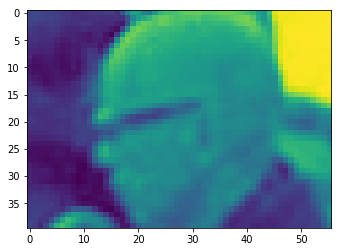

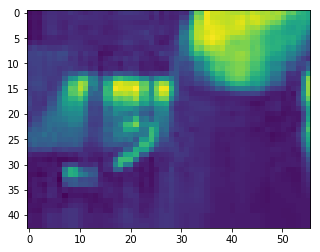

In [10]:
gray_test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY) 
histogram0 = cv2.calcHist([gray_test], [0],  
                         None, [256], [0, 256])
plt.imshow(gray_test)
plt.show()
gray_tq = cv2.cvtColor(tq, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_tq)
histogram1 = cv2.calcHist([gray_tq], [0],  
                          None, [256], [0, 256])
plt.show()
gray_tq1 = cv2.cvtColor(tq1, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_tq1)
histogram2 = cv2.calcHist([gray_tq1], [0],  
                          None, [256], [0, 256]) 

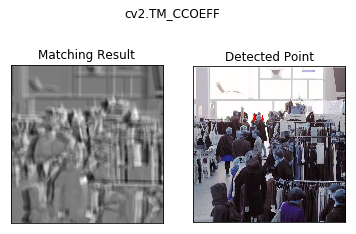

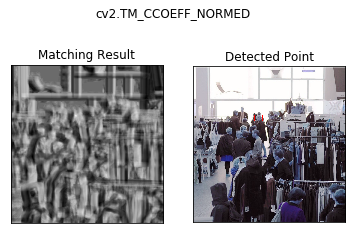

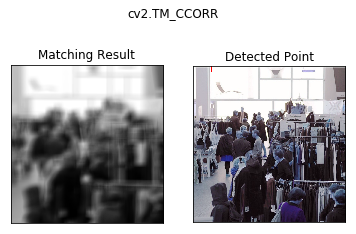

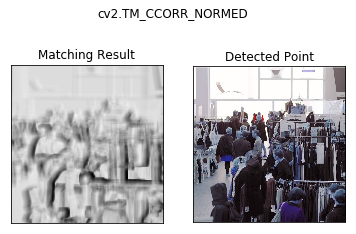

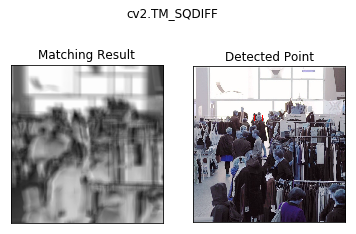

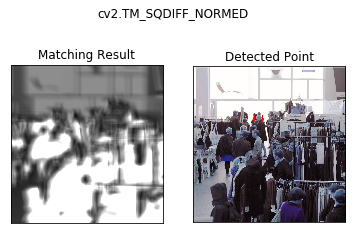

In [11]:
# scale_percent = 40  # percent of original size
# width = int(test.shape[1] * scale_percent / 100)
# height = int(test.shape[0] * scale_percent / 100)
# dim = (width, height)
# # resize image
# image1 = cv2.resize(test, dim, interpolation=cv2.INTER_AREA)
# # Read the template
template = cv2.imread("C:/Users/User1/Desktop/New folder (2)/test1.jpg")
# image1_size=image1.shape[:2]
# template_size=template.shape[:2]
# print("image_size(x,y)",image1_size)
# print("Template_size(x,y)",template_size)

# # Find template
# result = cv2.matchTemplate(gray_test,template,cv2.TM_CCOEFF)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
# top_left = max_loc
h,w,channels = template.shape
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = test.copy()
    method = eval(meth)
     # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121)
    plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(meth)

    plt.show()


Excep the following method, the other methods have detected queries:


TM_CCORR

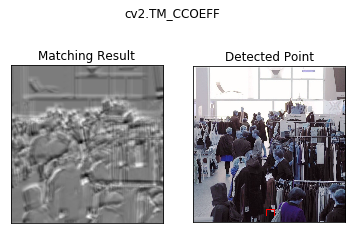

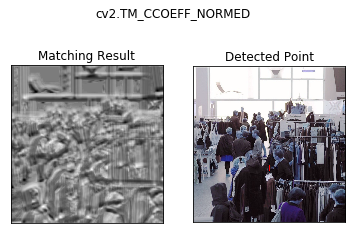

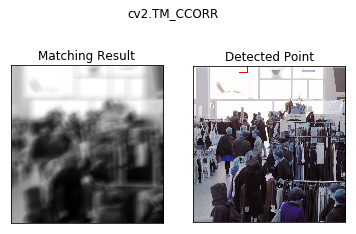

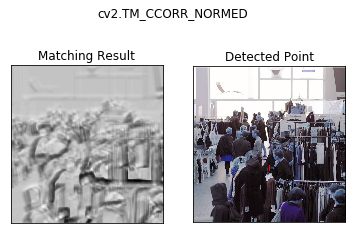

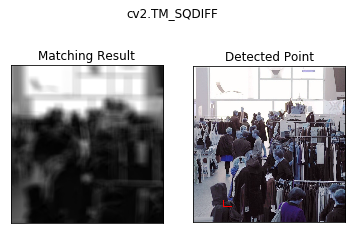

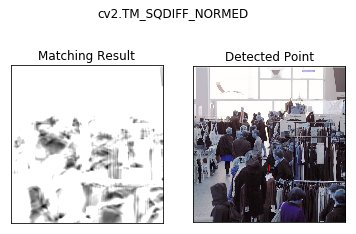

In [12]:
template = cv2.imread("C:/Users/User1/Desktop/New folder (2)/test2.jpg")
# image1_size=image1.shape[:2]
# template_size=template.shape[:2]
# print("image_size(x,y)",image1_size)
# print("Template_size(x,y)",template_size)

# # Find template
# result = cv2.matchTemplate(gray_test,template,cv2.TM_CCOEFF)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
# top_left = max_loc
h,w,channels = template.shape
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = test.copy()
    method = eval(meth)
     # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121)
    plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(meth)

    plt.show()

Except for the following two methods, the other methods have detected queries:


TM_CORR,TM_COEFF

In [13]:
# Perform match operations.
res = cv2.matchTemplate(image1, template, cv2.TM_SQDIFF)
min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)

confidence=(99999999-min_val)/10000000
print("primary confidence",'%.2f %%'% confidence)

altconfidence=100-((min_val/max_val)*100)
print("alternate confidence",'%.2f %%'% altconfidence)
topleftx=min_loc[0]
toplefty=min_loc[1]
sizex=template_size[1]
sizey=template_size[0]

if(altconfidence>99) or ((confidence>97) and (altconfidence>93)):
    print('dsfdf')
    if(len(sys.argv)>3):
        print("marking")
        marked = Image.open(sys.argv[3]) 
        draw = ImageDraw.Draw(marked) 
        draw.line(((topleftx, toplefty), (topleftx + sizex, toplefty)), fill="red", width=2) 
        draw.line(((topleftx + sizex, toplefty), (topleftx + sizex, toplefty + sizey)), fill="red", width=2) 
        draw.line(((topleftx + sizex, toplefty + sizey), (topleftx, toplefty + sizey)), fill="red", width=2) 
        draw.line(((topleftx, toplefty + sizey), (topleftx, toplefty)), fill="red", width=2) 
        del draw 
        marked.save(sys.argv[3], "PNG")
        
    else: 
        print ('The image was not found')



primary confidence 6.96 %
alternate confidence 86.15 %


NameError: name 'template_size' is not defined

In [14]:


# All the program statements
stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time)) # It returns time in seconds

Program Executed in 61.760179721
